In [5]:
from zf_unet.zf_unet_224_model import ZF_UNET_224, dice_coef_loss, dice_coef

Using TensorFlow backend.


In [310]:
!ls

Segmentation results.ipynb zf_unet
isic_melanoma              zf_unet_224.h5


In [311]:
outpath = "../data/out/masks/"

In [176]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import colorsys
import random

In [ ]:
from keras.optimizers import Adam

model = ZF_UNET_224()
model.load_weights("zf_unet_224.h5") # optional
optim = Adam()
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef])




In [253]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [254]:
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    image_new = np.copy(image)
    for c in range(3):
        image_new[:, :, c] = np.where(mask == 0 ,
                                  image[:, :, c]*
                                  (1 - alpha) + alpha * np.array(color[c]) * 255,
                                  image[:, :, c])
    return image_new

(1200, 1600, 3)


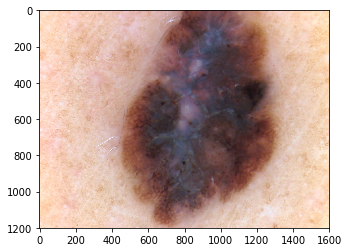

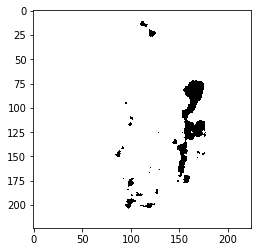

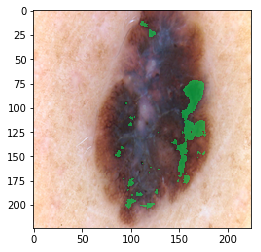

In [259]:
#image_path = "../data/melanoma/0462.jpg"
image_path = "../data/melanoma/0491.jpg"
image = cv2.imread(image_path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert channels
plt.imshow(image)
plt.show()


img = Image.fromarray(image)
img_res = img.resize((224, 224), Image.ANTIALIAS)
image = np.array(img_res)
image = image.reshape(1, 224,224,3)
y_pred = model.predict(image)
plt.imshow(y_pred.reshape((224,224)), cmap='gray')
plt.show()


mask = y_pred.reshape((224,224)).astype(int) ==1
image_reshape = image.reshape((224,224,3))
mask = mask.astype(int)

N = mask.shape[0]
colors = random_colors(N)
plt.imshow(apply_mask(image_reshape, mask, colors[1]))

(1200, 1600, 3)


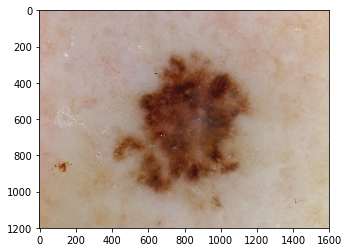

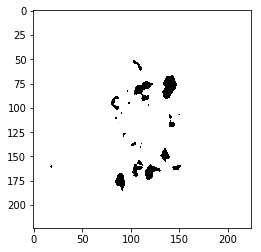

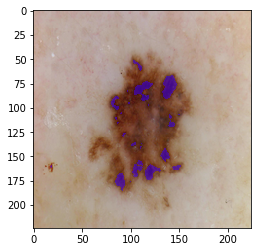

In [262]:
#image_path = "../data/benign/2916.jpg"
image_path = "../data/benign/2901.jpg"
image = cv2.imread(image_path)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert channels
plt.imshow(image)
plt.show()

#plot prediction
img = Image.fromarray(image)
img_res = img.resize((224, 224), Image.ANTIALIAS)
image = np.array(img_res)
image = image.reshape(1, 224,224,3)
y_pred = model.predict(image)
plt.imshow(y_pred.reshape((224,224)), cmap='gray')
plt.show()

# plot mask
mask = y_pred.reshape((224,224)).astype(int) ==1
image_reshape = image.reshape((224,224,3))
mask = mask.astype(int)
N = mask.shape[0]
colors = random_colors(N)
plt.imshow(apply_mask(image_reshape, mask, colors[1]))

# save mask into the folder

In [312]:
#for 500 images in melanom and 500 images in belgum save masks

In [313]:
from tqdm import tqdm

In [ ]:
melanoma_path = "../data/melanoma/"
benign_path = "../data/benign/"
